# String Matching Analysis

Consider a string of finite length $m$ Let it be $T$. Finding whether a string $P$ of length $n$ exsists in $T$ is known as String Matching, Following is some of the comparision based String Matching Algorithms.

- Brute Force String Matching Algorithm
- Horspool String Matching
- Boyer - Moore String Matching

Before looking at the analysis part, we shall examine the Language in built methods to sorting

## The `in` operator and `str.index()`

We have already seen the `in` operator in several contexts. Let's see the working of `in` operator again

In [1]:
x = 'this is some random text used for illustrative purposes'

In [2]:
x

'this is some random text used for illustrative purposes'

In [3]:
'this' in x

True

In [4]:
'not' in x

False

In [5]:
x.index('is')

2

In [6]:
x.index('not')

ValueError: substring not found

## Standard `import` statement

In [10]:
from openanalysis.string_matching import StringMatchingAlgorithm,StringMatchingAnalyzer
%matplotlib inline
%config InlineBackend.figure_formats={"svg", "pdf"}

`StringMatchingAlgorithm` is the base class providing the standards to implement sorting algorithms, `SearchVisualizer` visualizes and analyses the algorithm

## `StringMatchingAlgorithm` class

Any String Matching Algorithm, which has to be implemented, has to be derived from this class. Now we shall see data members and member functions of this class.

### Data Members

- `name` -  Name of the Searching Algorithm
- `count` - Holds the number of basic operations performed

### Member Functions

- `__init__(self, name):` - Initializes algorithm with a `name`
- `match(self, text, pattern)` _ The base String Matching function. Sets `count` to 0. 

## An example .... Horspool String Matching Algorithm

Now we shall implement the class `Horspool`

In [11]:
class Horspool(StringMatchingAlgorithm):            # Must derive from StringMatchingAlgorithm
    def __init__(self):
        StringMatchingAlgorithm.__init__(self, "Hosrpool String Matching")
        self.shift_table = {}
        self.pattern = ''

    def generate_shift_table(self, pattern):              # class is needed to include helper methods
        self.pattern = pattern
        for i in range(0, len(pattern) - 1):
            self.shift_table[pattern[i]] = len(pattern) -i - 1

    def match(self, text: str, pattern: str):
        StringMatchingAlgorithm.match(self, text, pattern)
        self.generate_shift_table(pattern)
        i = len(self.pattern) - 1
        while i < len(text):
            j = 0
            while j < len(self.pattern) and text[i-j] == self.pattern[len(self.pattern)-1-j]:
                j += 1
            self.count += j                                         # Increment count here
            if j == len(self.pattern):
                return i-len(self.pattern)+1
            if text[i] in self.shift_table:
                i += self.shift_table[text[i]]
            else:
                i += len(self.pattern)
        return -1

## `StringMatchingAnalyzer` class

This class provides the visualization and analysis methods. Let's see its methods in detail

- `__init__(self, matching):` Initializes visualizer with a String Matching Algorithm. 
    - `searcher` is a class, which is derived from `StringMatchingAlgorithm`
    
    
- `analyze(self,progress = True):`
    - Plots the number of basic operations performed
    - Both Text length and Pattern Length are varied
    - Samples are chosen randomly from pre defined large data
    - `progress` indicates whether Progress Bar has to be shown or not

Please wait while analysing Hosrpool String Matching algorithm


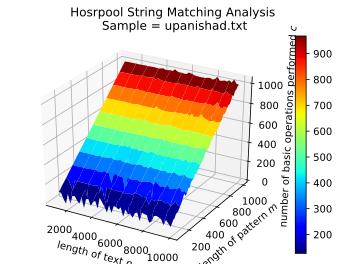

In [13]:
StringMatchingAnalyzer(Horspool).analyze(progress=False)

Note $\mathcal{O}(n)$ performance of algorithm

## Example File

You can see more examples at [Github](https://github.com/OpenWeavers/openanalysis/blob/master/analysistest/string_matching.py)